In [9]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2023-05-04  106.160004  106.300003  104.699997  105.209999  105.209999   
1 2023-05-05  105.320000  106.440002  104.738998  106.214996  106.214996   
2 2023-05-08  105.794998  108.419998  105.790001  108.239998  108.239998   
3 2023-05-09  108.779999  110.595001  107.724998  107.940002  107.940002   
4 2023-05-10  108.550003  113.510002  108.480003  112.279999  112.279999   

     Volume  
0  19780600  
1  20705300  
2  17266000  
3  24782400  
4  47533500  


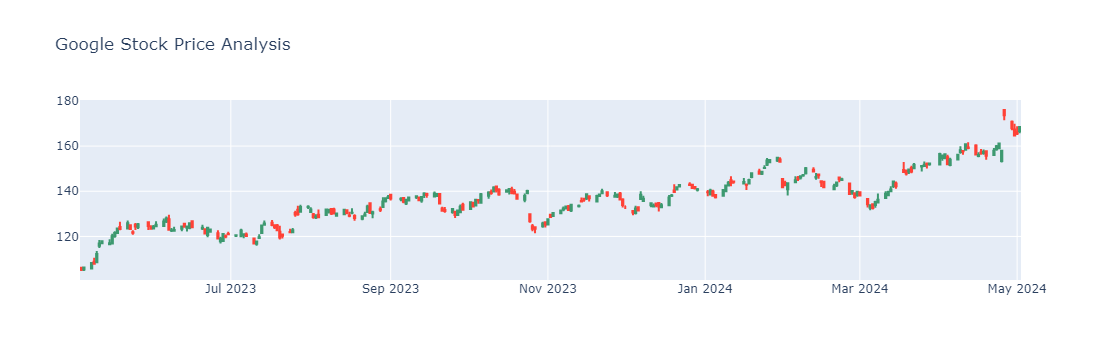

In [21]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

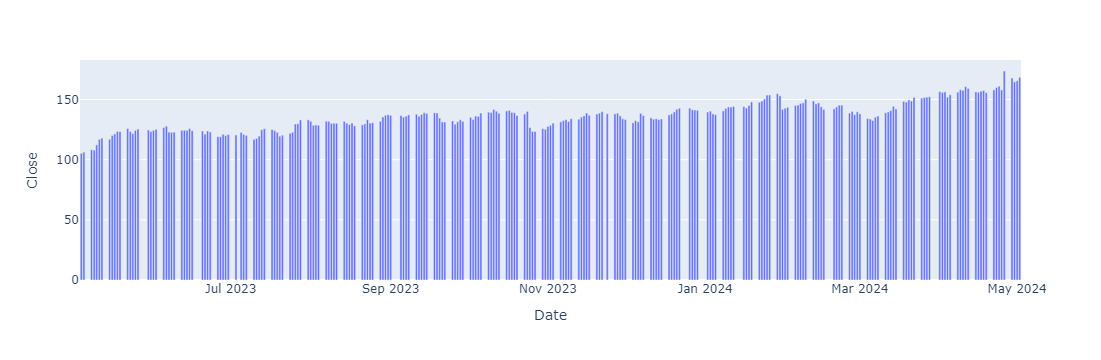

In [12]:
figure = px.bar(data, x = "Date", y= "Close")
figure.show()

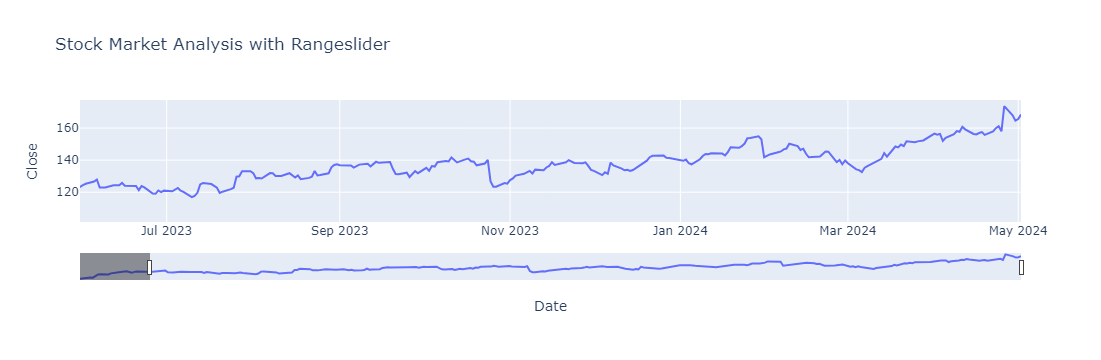

In [16]:
figure = px.line (data, x = 'Date' , y = 'Close',
                 title = 'Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()


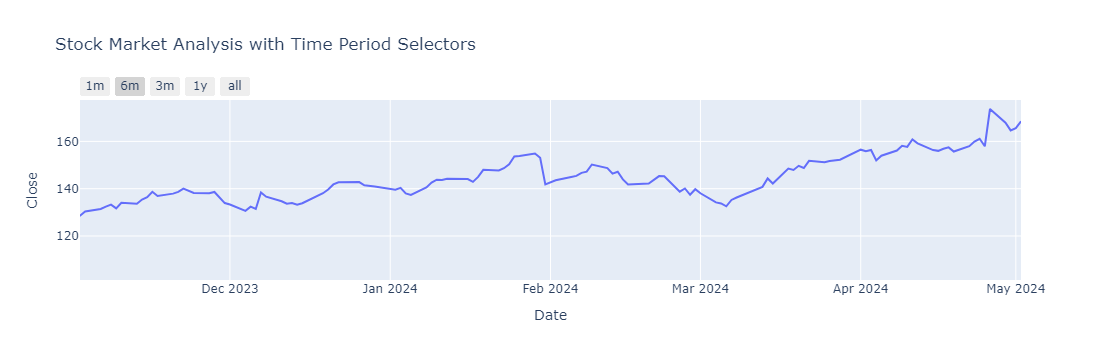

In [17]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

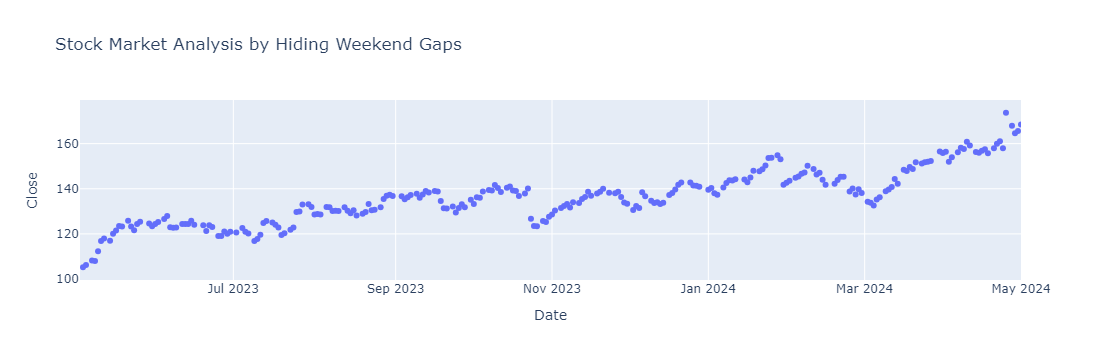

In [20]:
figure = px.scatter(data, x='Date', y='Close', range_x=['2023-05-03', '2024-05-02'],
                 title="Stock Market Analysis by Hiding Weekend Gaps")
figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "sun"])
    ]
)
figure.show()